W tym notatniku Jupyter skupimy się na podstawowej analizie danych pod kątem budowy modeli sztucznej inteligencji oraz budowaniu różnych modeli, służących do dwóch różnych problemów, które określimy poniżej

In [1]:
#importowanie potrzebnych bibliotek do analizy i budowy modelu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
#przedstawienie danych w postaci dataframe
dataframe = pd.read_csv('SalmonandSeaTroutNets1952-2022.csv')
dataframe.head(10)

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
5,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,April,4.0,4253.0,16522.1,...,5.4,1244.0,1413.4,0.0,0.0,0.0,0.0,0.0,0.0,31.0
6,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,May,5.0,754.0,3310.3,...,23.1,60.0,104.3,0.0,0.0,0.0,0.0,0.0,0.0,28.0
7,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,May,5.0,2370.0,9800.8,...,49.9,2689.0,3519.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
8,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,June,6.0,461.0,2190.9,...,427.7,80.0,126.1,0.0,0.0,0.0,0.0,0.0,0.0,29.0
9,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,June,6.0,2157.0,9948.6,...,2695.2,7286.0,11079.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0


In [3]:
#wyświetlenie informacji o danych
print(dataframe.info())
print(dataframe.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                23140 non-null  object 
 1   District ID             23140 non-null  float64
 2   Report order            23140 non-null  float64
 3   Region                  23140 non-null  object 
 4   Method                  23140 non-null  object 
 5   Year                    23140 non-null  float64
 6   Month                   23140 non-null  object 
 7   Month number            23140 non-null  float64
 8   Wild MSW number         23140 non-null  float64
 9   Wild MSW weight (kg)    23140 non-null  float64
 10  Wild 1SW number         23140 non-null  float64
 11  Wild 1SW weight (kg)    23140 non-null  float64
 12  Sea trout number        23140 non-null  float64
 13  Sea trout weight (kg)   23140 non-null  float64
 14  Finnock number          23140 non-null

In [4]:
#sprawdzmy czy występują braki danych
dataframe.isnull().sum()

District                  3
District ID               3
Report order              3
Region                    3
Method                    3
Year                      3
Month                     3
Month number              3
Wild MSW number           3
Wild MSW weight (kg)      3
Wild 1SW number           3
Wild 1SW weight (kg)      3
Sea trout number          3
Sea trout weight (kg)     3
Finnock number            3
Finnock weight (kg)       3
Farmed MSW number         3
Farmed MSW weight (kg)    3
Farmed 1SW number         3
Farmed 1SW weight (kg)    3
Netting effort            3
dtype: int64

In [5]:
#usuwamy wiersze z pustymi danymi (3) - jest ich bardzo mało więc nie wpłynie to znacząco na wynik modeli 
dataframe = dataframe.dropna()
dataframe.isnull().values.any() #widzimy, że nie ma już pustych danych

False

Warto teraz określić problem, który będziemy poruszać jako pierwszy. Spróbujmy zbudować modele, które będą klasyfikować region, w którym była złapana ryba. Następnie porównamy ich wyniki i zobaczymy, który poradził sobie najlepiej.

Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Orkney               3
Name: count, dtype: int64


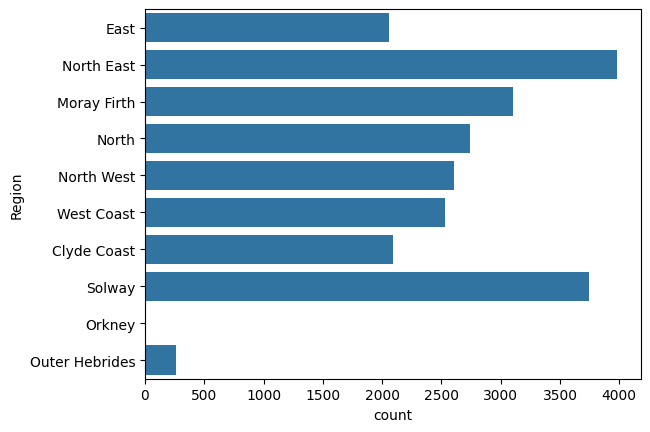

In [6]:
#sprawdzmy jak wygląda rozkład danych w poszczegolnych regionach
sns.countplot(dataframe['Region'])
#po bardziej szczegółowe liczby możemy użyć tej funkcji
print(dataframe['Region'].value_counts())

In [7]:
#z racji na bardzo małą próbkę danych z regionu "Orkney", usuniemy te dane z naszego zbioru
dataframe = dataframe[dataframe.Region != 'Orkney']
print(dataframe['Region'].value_counts())

Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Name: count, dtype: int64


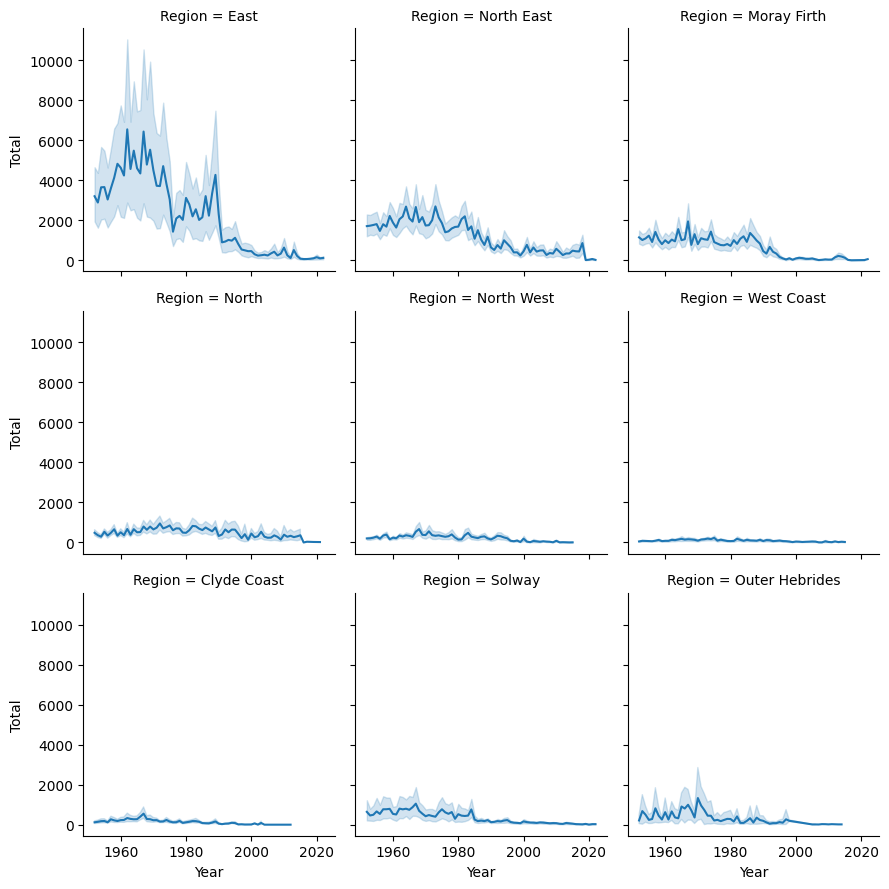

In [8]:
#możemy jeszcze zobaczyć jak wygląda ilość łowionych ryb w poszczególnych latach w każdym regionie, do tego musimy dodać jeszcze jedną kolumnę, sumującą ilość ryb
dataframe['Total'] = dataframe['Wild 1SW number'] + dataframe['Wild MSW number'] + dataframe['Sea trout number'] + dataframe['Finnock number'] + dataframe['Farmed 1SW number'] + dataframe['Farmed MSW number']
plot = sns.FacetGrid(dataframe, col='Region', col_wrap=3)
plot.map(sns.lineplot, 'Year', 'Total')


Zanim przystąpimy do dalszej analizy powinniśmy przystosować do niej nasze dane, transformując je na dane liczbowe

In [9]:
#transforamcja danych kategorycznych na dane numeryczne
from sklearn.preprocessing import LabelEncoder
dataframe = dataframe.apply(LabelEncoder().fit_transform)
dataframe.head(10)

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort,Total
0,90,89,0,1,1,0,2,0,107,1579,...,0,0,0,0,0,0,0,0,8,107
1,90,89,0,1,3,0,2,0,1879,6696,...,450,1805,0,0,0,0,0,0,62,3206
2,90,89,0,1,1,0,5,1,185,2285,...,13,186,0,0,0,0,0,0,20,198
3,90,89,0,1,3,0,5,1,1885,6703,...,777,2212,0,0,0,0,0,0,62,3274
4,90,89,0,1,1,0,0,2,484,4063,...,14,174,0,0,0,0,0,0,42,498
5,90,89,0,1,3,0,0,2,1796,6577,...,1004,2336,0,0,0,0,0,0,62,2988
6,90,89,0,1,1,0,6,3,744,5001,...,60,567,0,0,0,0,0,0,56,830
7,90,89,0,1,3,0,6,3,1556,6310,...,1401,2846,0,0,0,0,0,0,62,2923
8,90,89,0,1,1,0,4,4,461,4306,...,80,640,0,0,0,0,0,0,58,780
9,90,89,0,1,3,0,4,4,1508,6321,...,1750,3154,0,0,0,0,0,0,62,3447


<Axes: >

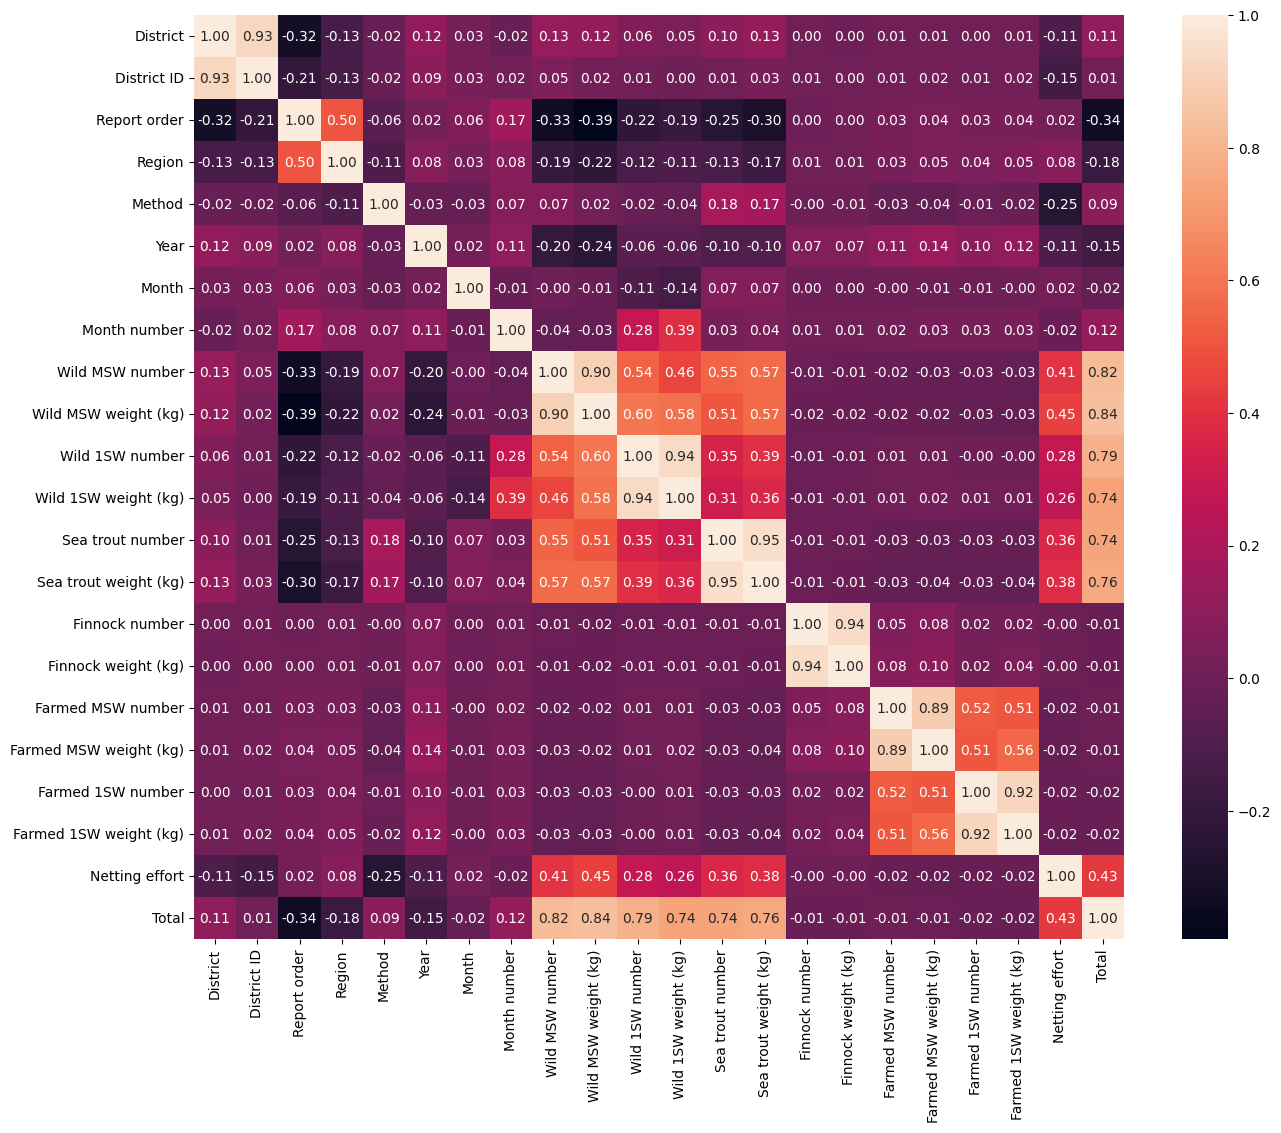

In [10]:
#zobaczmy teraz jak wygląda korelacja między danymi
correlation = dataframe.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True, fmt=".2f")

Po wstępnej analizie danych możemy przystąpić do podziału danych na treningowe, walidacyjne i testowe oraz napisanie funkcji do trenowania modeli

In [11]:
#wydzielenie danych do trenowania i testowania modelu
X = dataframe.drop('Region', axis=1)
Y = dataframe['Region']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
#funkcja do trenowania i  modelu
def train_model(model, X_train, Y_train, X_test):
    model.fit(X_train, Y_train)
    
    predictions = model.predict(X_test)

    scores = list(metrics.precision_recall_fscore_support(predictions, Y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]

    score_vals.append(metrics.accuracy_score(predictions, Y_test))

    return score_vals

In [14]:
#MODEL 1 - regresja logistyczna
accuracy_comparison = []
rf_accuracy = train_model(LogisticRegression(), X_train, Y_train, X_test)
accuracy_comparison.append(rf_accuracy)

C:\Users\Adam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
accuracy_comparison

[[0.14746543778801843, 0.5, 0.2277580071174377, 0.4842264477095938]]